# Data Exploration/Cleaning of Boston Housing dataset:
    -  Univariable study of target and features (Continuous & Categorical features, separately)
    -  Multivariate study of target and features
    -  Testing the statistical assumptions: Normality, Homoscedasticity, etc.
    -  Basic cleaning: Outliers, Missing data, Duplicate values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Functions to detect & plot Outliers with different approaches:

def zscore_based_outliers(ys, threshold = 3):

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.abs(z_scores) > threshold

def mad_based_outlier(ys, thresh=3.5):
    median = np.median(ys, axis=0)
    mad=np.median(np.array([np.abs(y - median)  for y in ys]))
    modified_z_score=[0.6745 *(y - median) / mad for y in ys]
    return np.abs(modified_z_score) > thresh


def iqr_based_outliers(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = np.abs(quartile_3 - quartile_1)
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return (ys > upper_bound) | (ys < lower_bound)

def plot_outliers(x):
    fig, axes = plt.subplots(nrows=3)
    fig.set_size_inches(6, 6)
    for ax, func in zip(axes, [zscore_based_outliers, mad_based_outlier, iqr_based_outliers]):
        sns.distplot(x, ax=ax, rug=True, hist=True)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top')
    
    axes[0].set_title('Zscore-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('IQR-based Outliers', **kwargs)
    
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=14)

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
X=pd.DataFrame(load_boston().data, columns=boston.feature_names)
y=pd.DataFrame(load_boston().target, columns=["Value"])
df=pd.concat([y,X], axis=1)

In [7]:
df.head(3)

Value     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0   24.0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1   21.6  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2   34.7  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
Value      506 non-null float64
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


Value      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

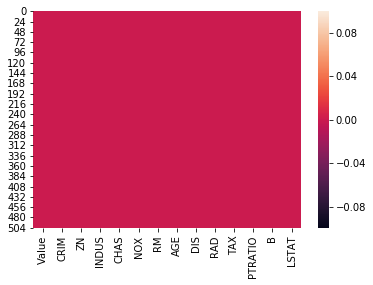

In [9]:
# To find and see the Missing Values:
sns.heatmap(df.isnull())
df.isnull().sum()

In [10]:
L_con=['Value', 'CRIM', 'ZN', 'INDUS',  'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
L_cat=['CHAS']

______________________________________________________________________
variable name:  Value 

Statistical description: 
count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: Value, dtype: float64

Skewness =  1.1080984082549072
Kurtosis =  1.495196944165818


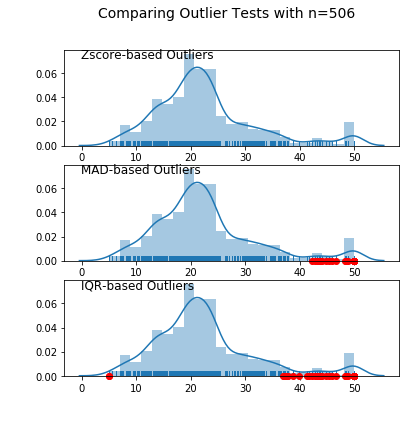

______________________________________________________________________
variable name:  CRIM 

Statistical description: 
count    506.000000
mean       3.593761
std        8.596783
min        0.006320
25%        0.082045
50%        0.256510
75%        3.647423
max       88.976200
Name: CRIM, dtype: float64

Skewness =  5.237578293084702
Kurtosis =  37.26717975085283


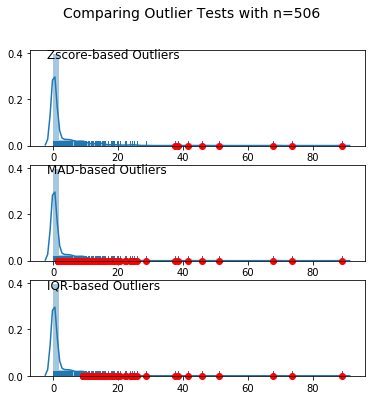

______________________________________________________________________
variable name:  ZN 

Statistical description: 
count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

Skewness =  2.2256663227354307
Kurtosis =  4.031510083739155


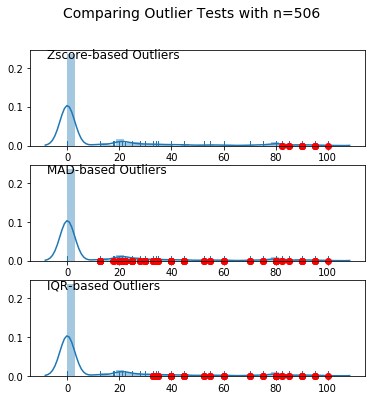

______________________________________________________________________
variable name:  INDUS 

Statistical description: 
count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64

Skewness =  0.29502156787351164
Kurtosis =  -1.2335396011495188


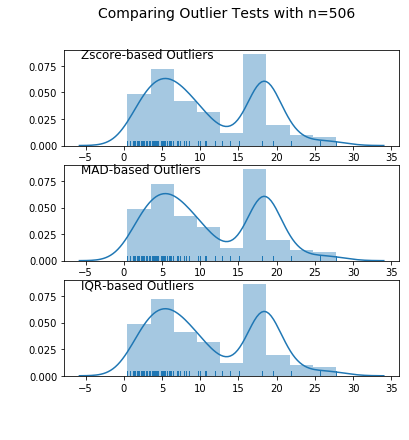

______________________________________________________________________
variable name:  NOX 

Statistical description: 
count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64

Skewness =  0.7293079225348787
Kurtosis =  -0.06466713336542629


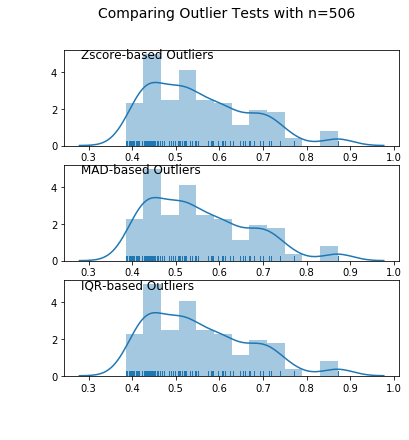

______________________________________________________________________
variable name:  RM 

Statistical description: 
count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

Skewness =  0.40361213328874385
Kurtosis =  1.8915003664993404


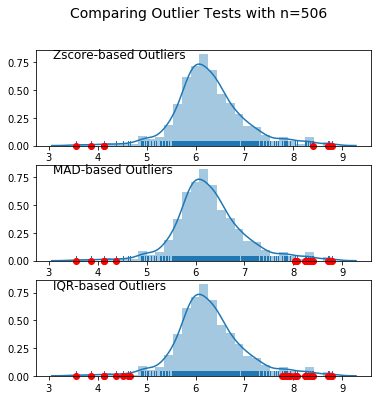

______________________________________________________________________
variable name:  AGE 

Statistical description: 
count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

Skewness =  -0.5989626398812962
Kurtosis =  -0.9677155941626912


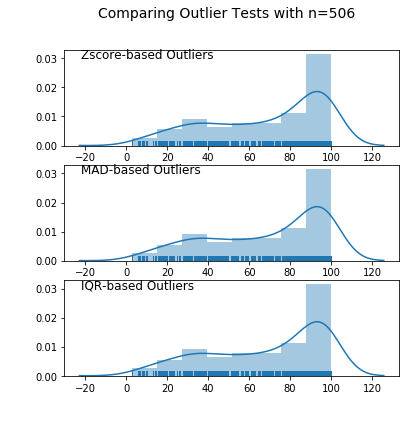

______________________________________________________________________
variable name:  DIS 

Statistical description: 
count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: DIS, dtype: float64

Skewness =  1.0117805793009007
Kurtosis =  0.4879411222443908


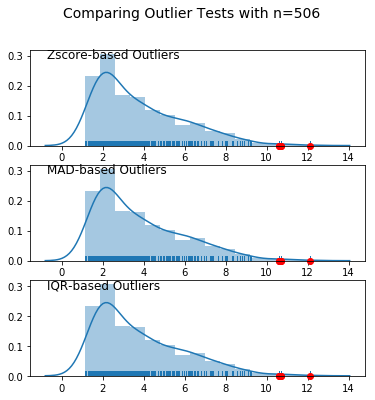

______________________________________________________________________
variable name:  RAD 

Statistical description: 
count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64

Skewness =  1.0048146482182057
Kurtosis =  -0.8672319936034931


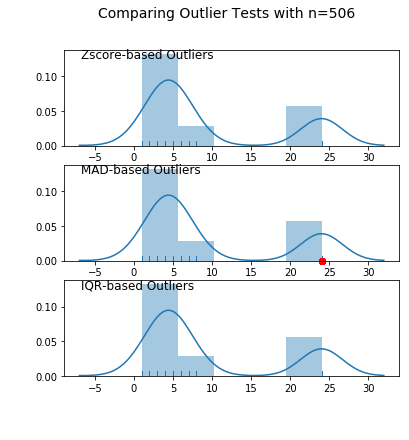

______________________________________________________________________
variable name:  TAX 

Statistical description: 
count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64

Skewness =  0.669955941795016
Kurtosis =  -1.1424079924768082


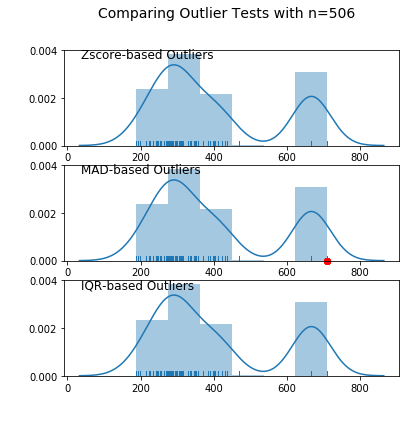

______________________________________________________________________
variable name:  PTRATIO 

Statistical description: 
count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

Skewness =  -0.8023249268537809
Kurtosis =  -0.28509138330538875


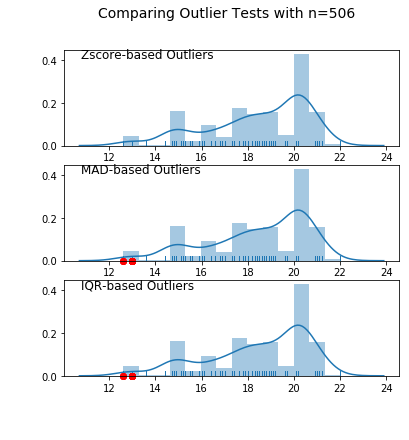

______________________________________________________________________
variable name:  B 

Statistical description: 
count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64

Skewness =  -2.8903737121414492
Kurtosis =  7.226817549260753


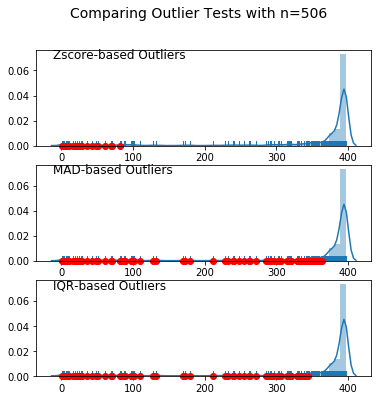

______________________________________________________________________
variable name:  LSTAT 

Statistical description: 
count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

Skewness =  0.9064600935915367
Kurtosis =  0.49323951739272776


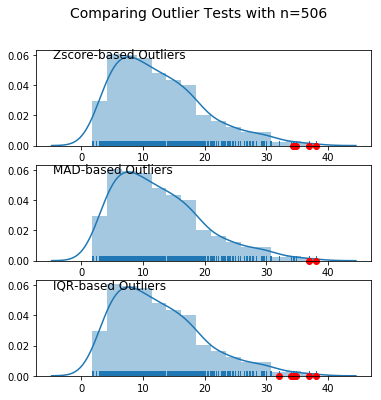

In [11]:
# Univariate analysis of Continuous varaibles: Statistical description (mean, std, skewness, Kurtosis) & Distribution plots
# of each continuous variable 
L=[]
for i in L_con:
    print('_'*70 )
    print('variable name: ', i, '\n')
    
    print('Statistical description: \n', df[i].describe(), '\n', sep='')
    
    if df[i].min()==0: 
        L.append(i)
    
    print("Skewness = ", df[i].skew())
    print("Kurtosis = ", df[i].kurt())
    
    #sns.distplot(df[i], kde=True)
    plot_outliers(np.array(df[i]))
    plt.show()

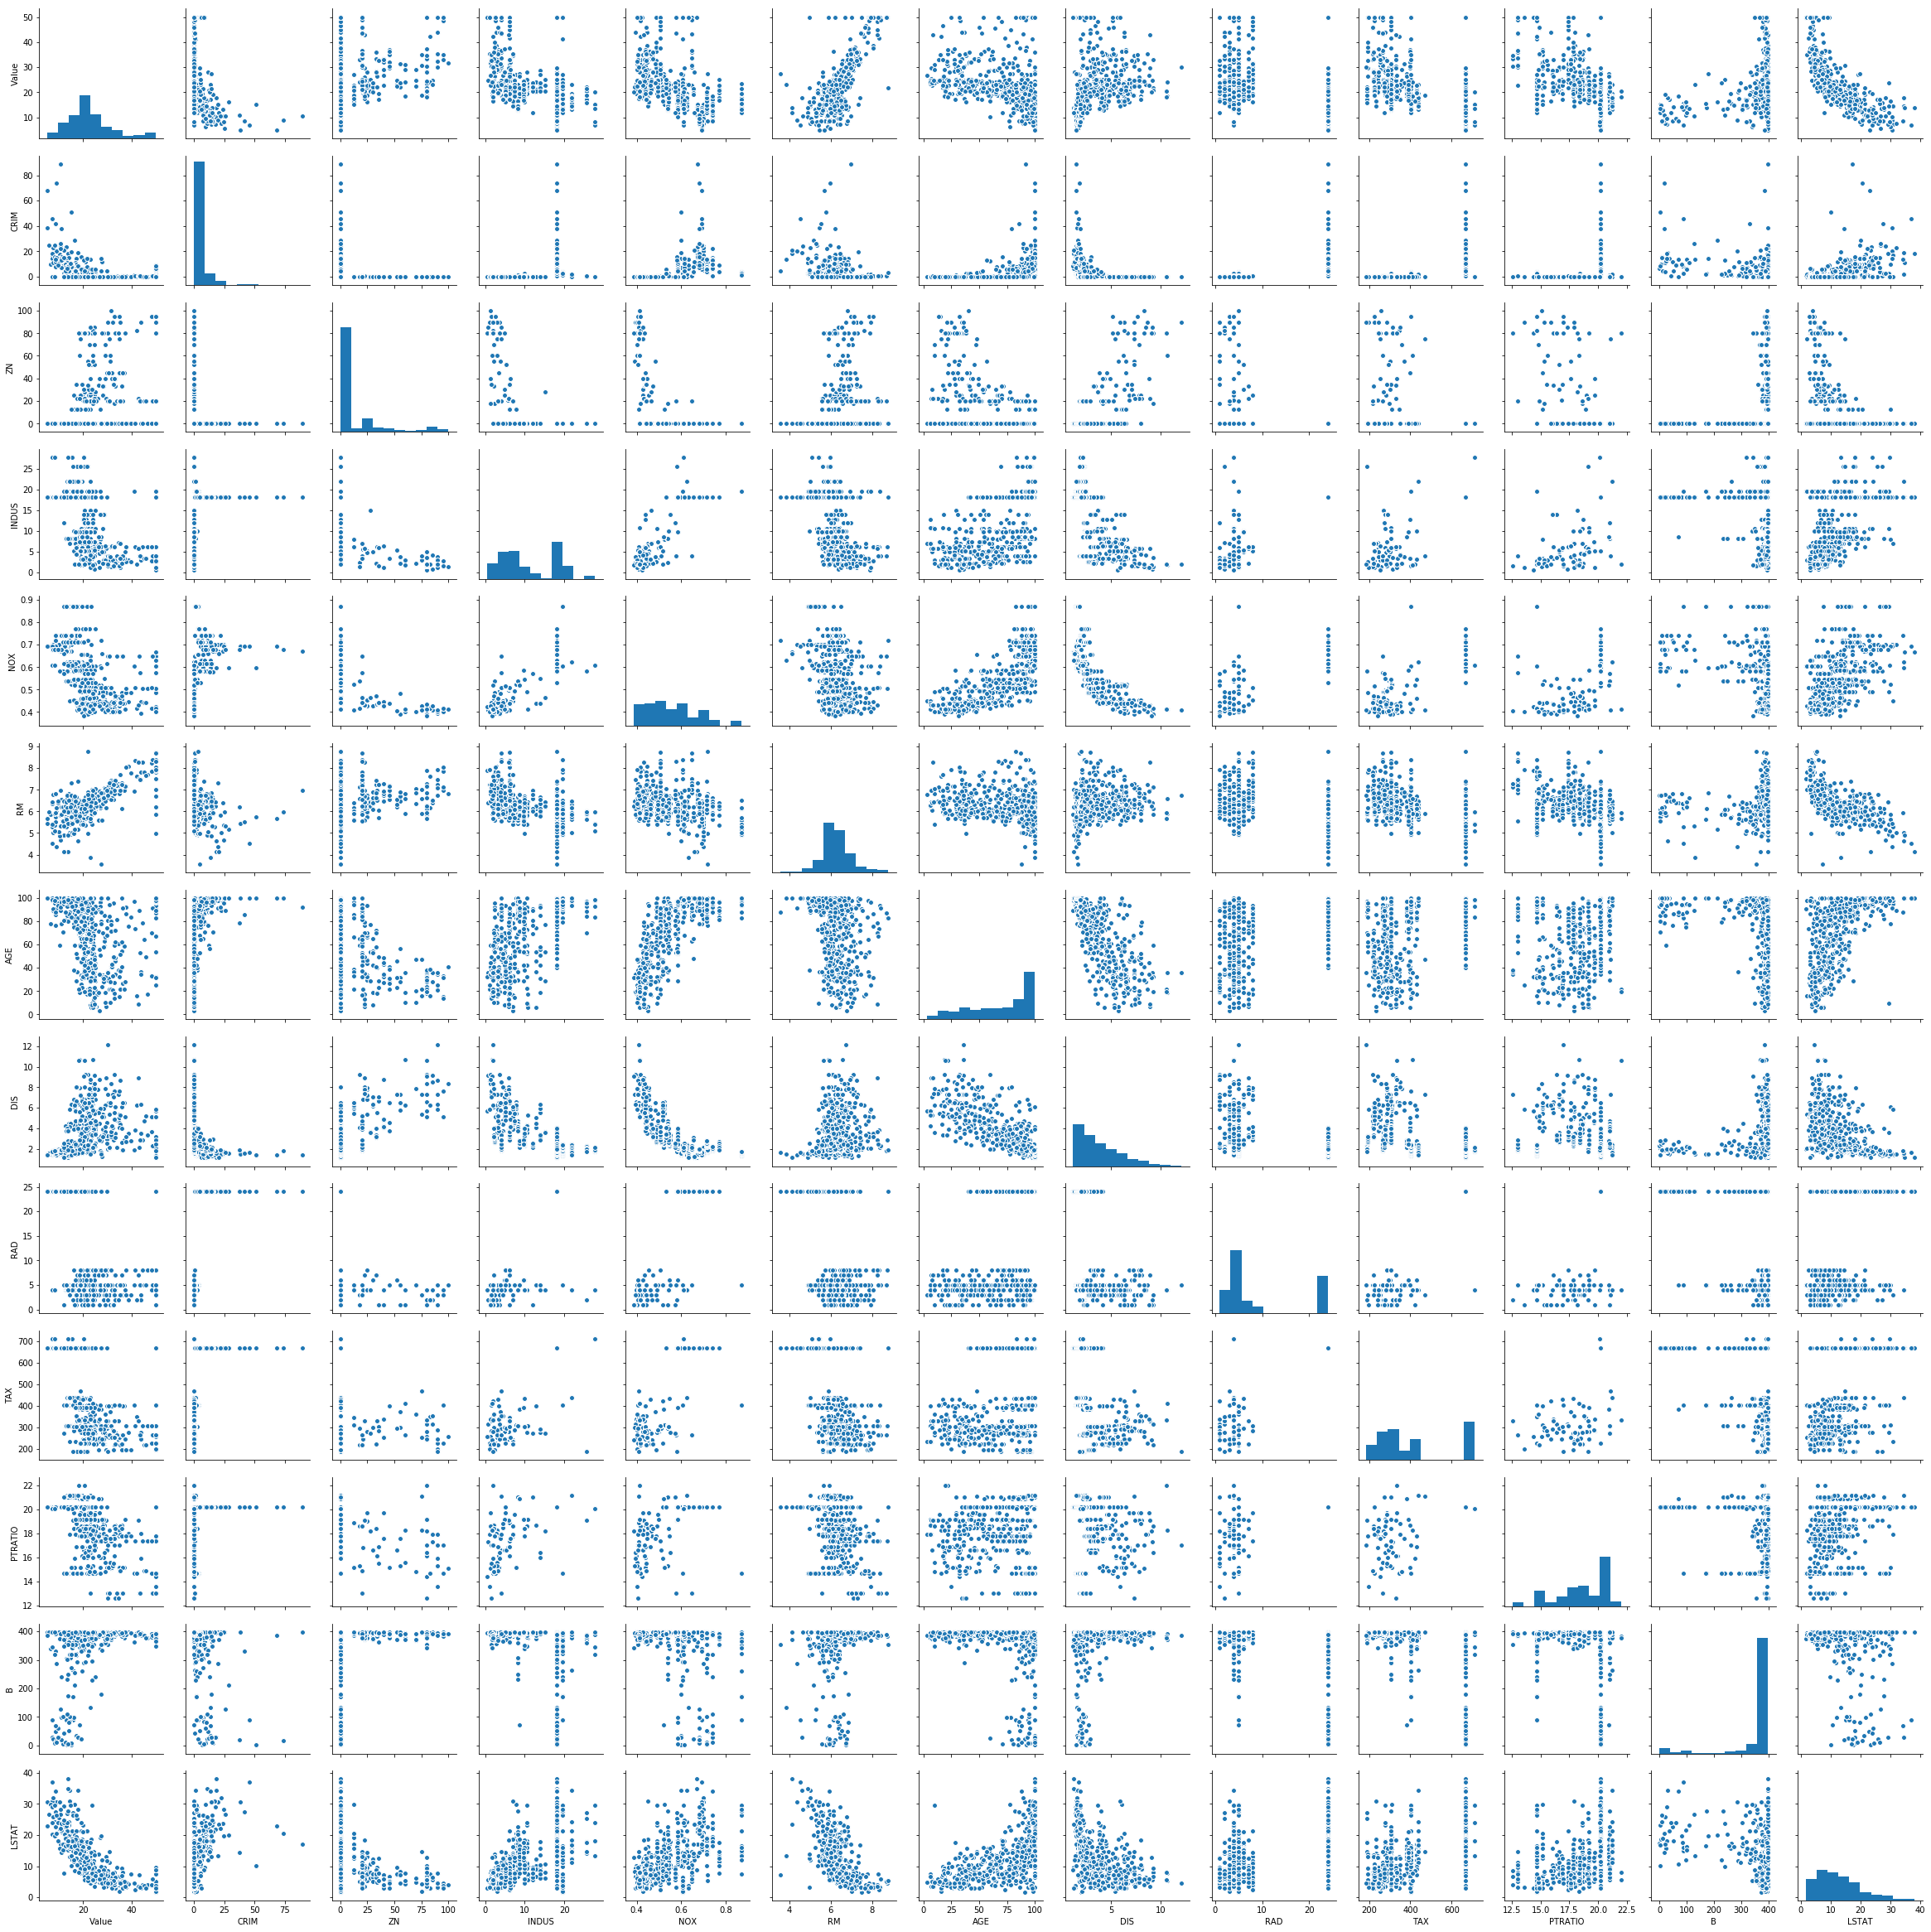

In [12]:
# Multi-variable analysis of Contineous Features: Pairplot of all continuous variables
sns.pairplot(df[L_con])

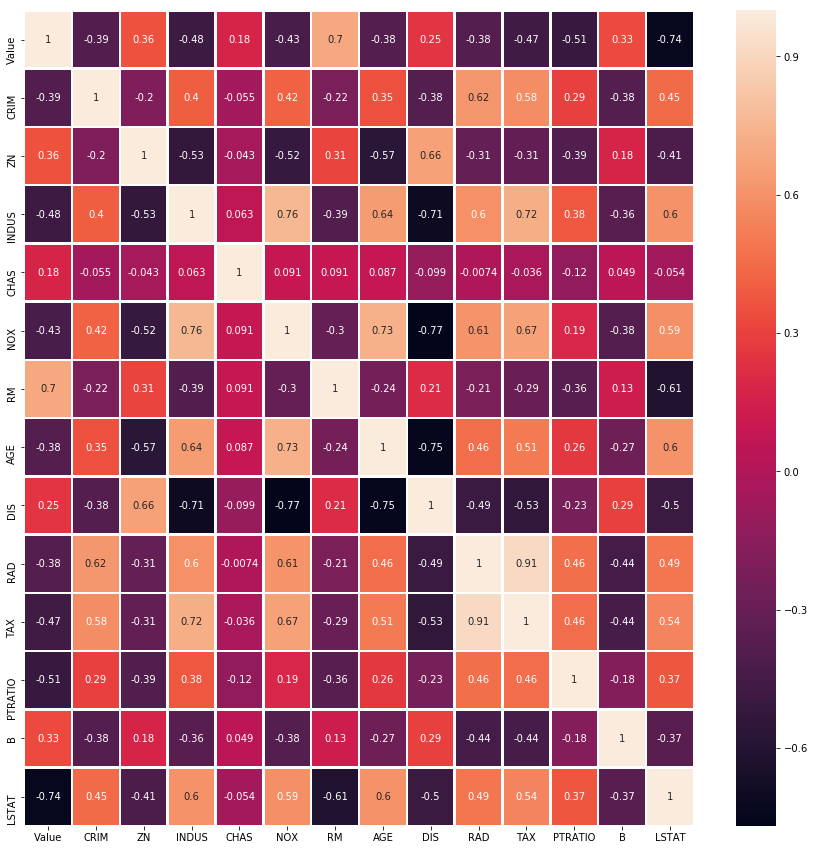

In [13]:
# Multivariable study: heatmap of correlation between continuous features
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df.corr(), annot=True, linewidths=1.5, ax=ax )

______________________________________________________________________
variable name:  CRIM


<Figure size 432x432 with 0 Axes>

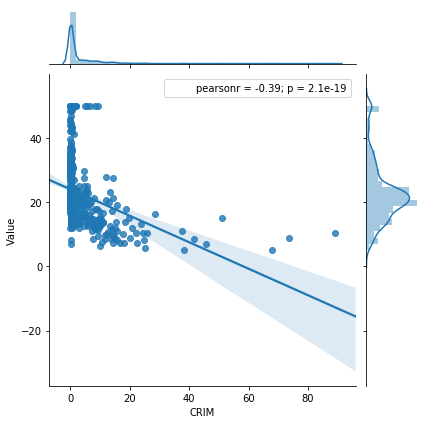

______________________________________________________________________
variable name:  ZN


<Figure size 432x432 with 0 Axes>

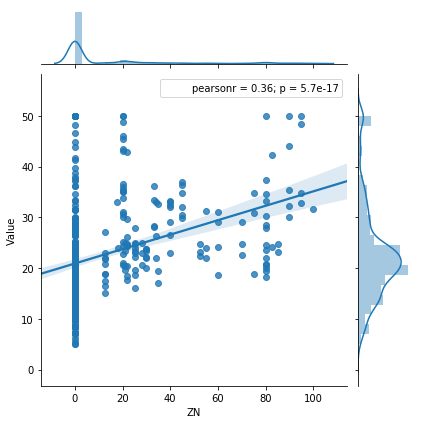

______________________________________________________________________
variable name:  INDUS


<Figure size 432x432 with 0 Axes>

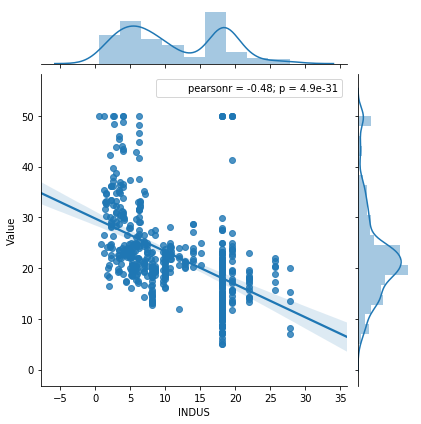

______________________________________________________________________
variable name:  NOX


<Figure size 432x432 with 0 Axes>

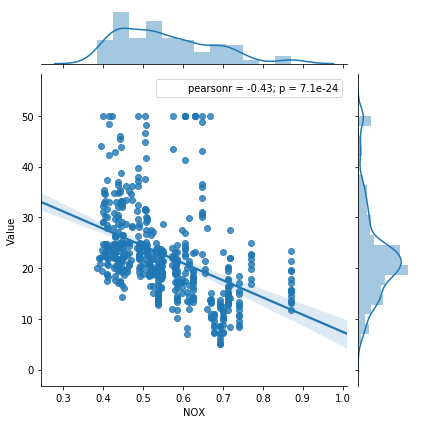

______________________________________________________________________
variable name:  RM


<Figure size 432x432 with 0 Axes>

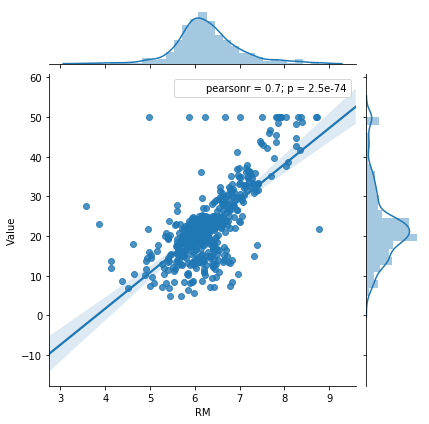

______________________________________________________________________
variable name:  AGE


<Figure size 432x432 with 0 Axes>

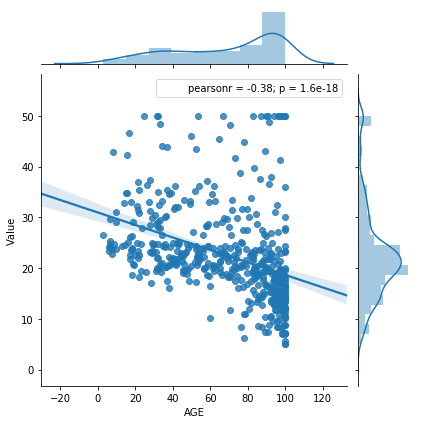

______________________________________________________________________
variable name:  DIS


<Figure size 432x432 with 0 Axes>

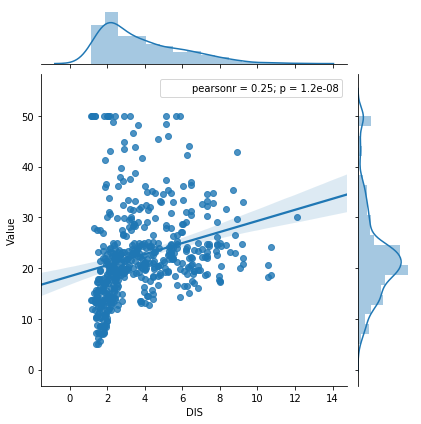

______________________________________________________________________
variable name:  RAD


<Figure size 432x432 with 0 Axes>

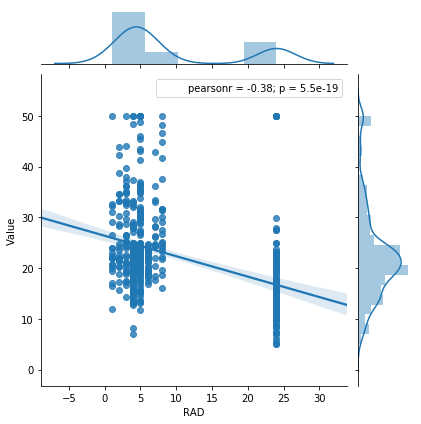

______________________________________________________________________
variable name:  TAX


<Figure size 432x432 with 0 Axes>

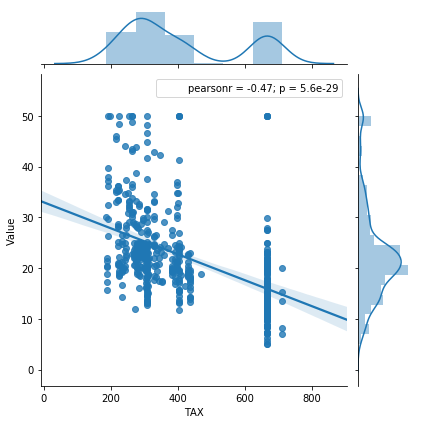

______________________________________________________________________
variable name:  PTRATIO


<Figure size 432x432 with 0 Axes>

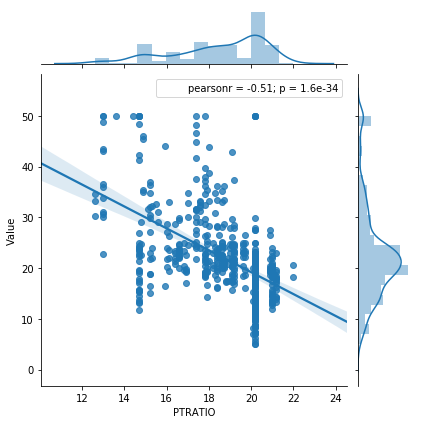

______________________________________________________________________
variable name:  B


<Figure size 432x432 with 0 Axes>

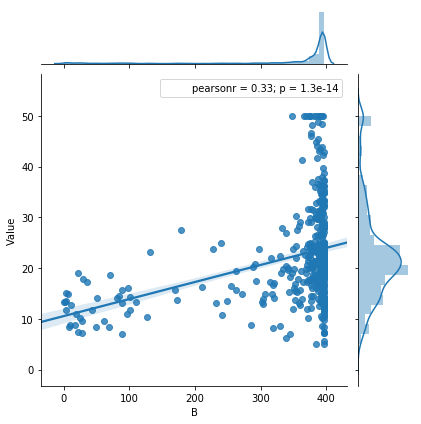

______________________________________________________________________
variable name:  LSTAT


<Figure size 432x432 with 0 Axes>

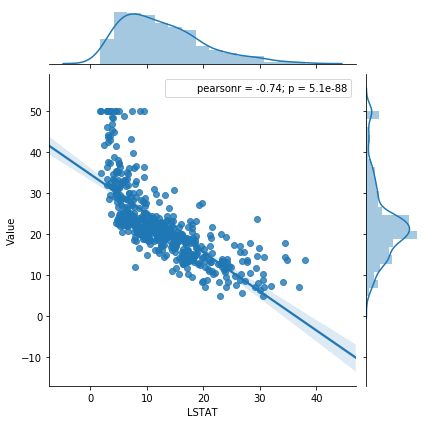

In [14]:
# Multivariable analysis of Contineous Features: Target variable Vs. feature 
for i in ['CRIM', 'ZN', 'INDUS',  'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']:
    print('_'*70 )
    print('variable name: ', i)
    
    plt.figure(figsize=(6, 6))
    sns.jointplot( x=i, y='Value', data=df[L_con], kind='reg')

    plt.show()

______________________________________________________________________
variable name:  Value


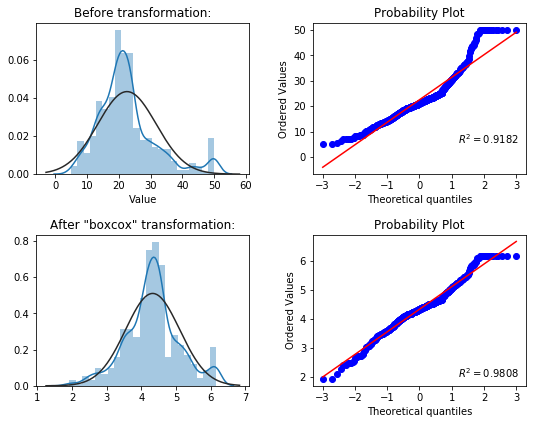

______________________________________________________________________
variable name:  CRIM


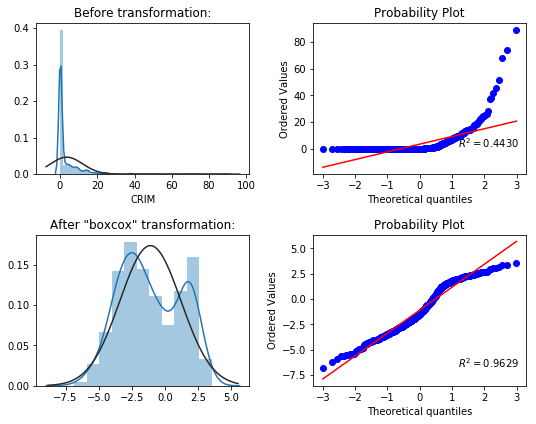

______________________________________________________________________
variable name:  ZN


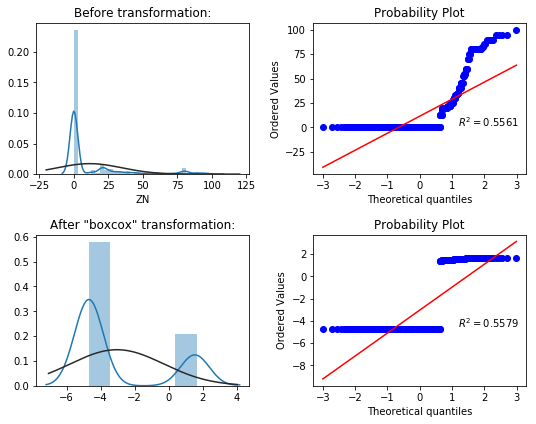

______________________________________________________________________
variable name:  INDUS


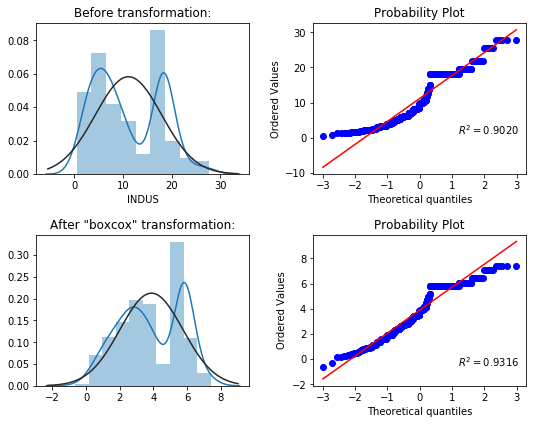

______________________________________________________________________
variable name:  NOX


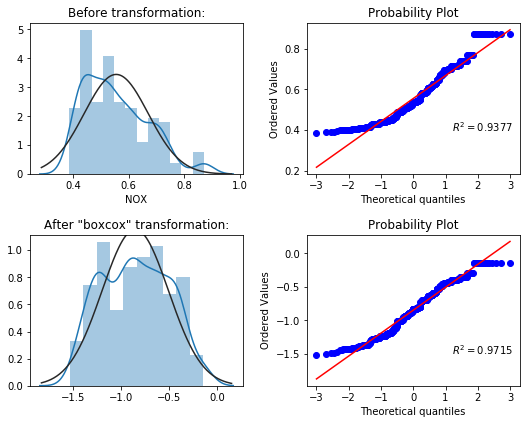

______________________________________________________________________
variable name:  RM


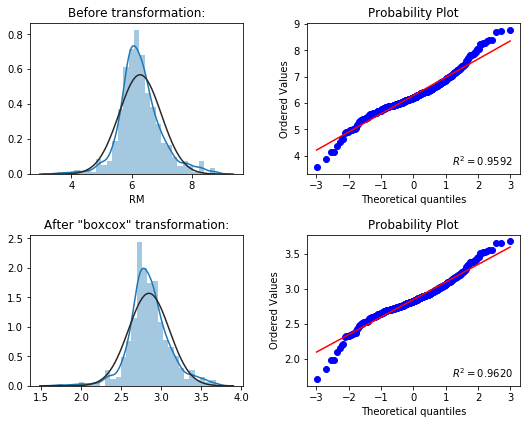

______________________________________________________________________
variable name:  AGE


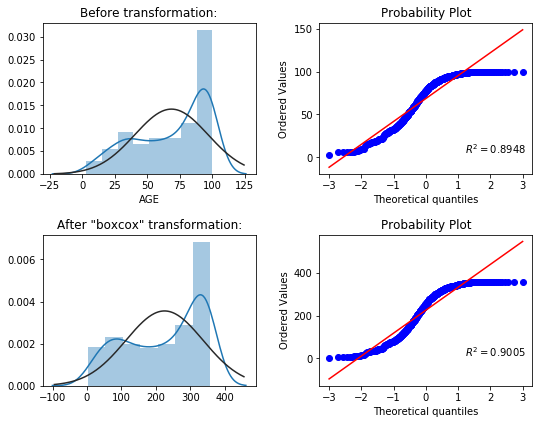

______________________________________________________________________
variable name:  DIS


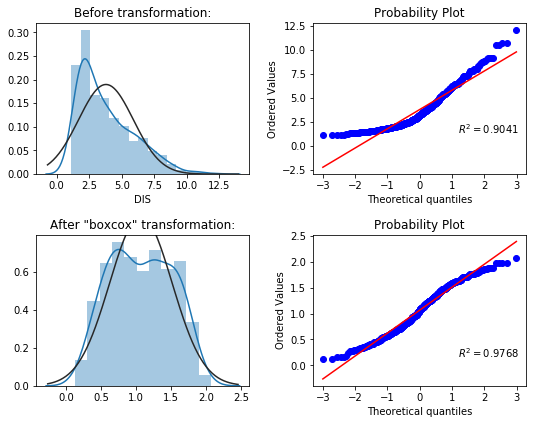

______________________________________________________________________
variable name:  RAD


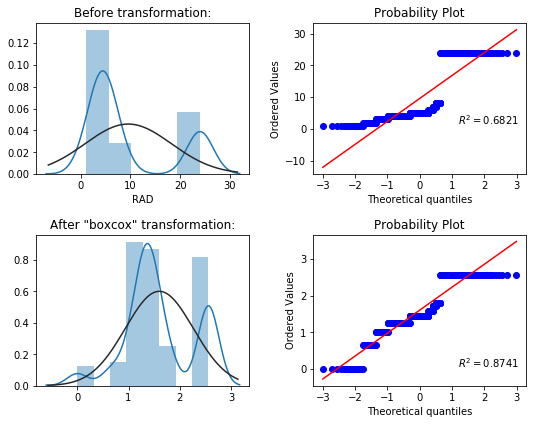

______________________________________________________________________
variable name:  TAX


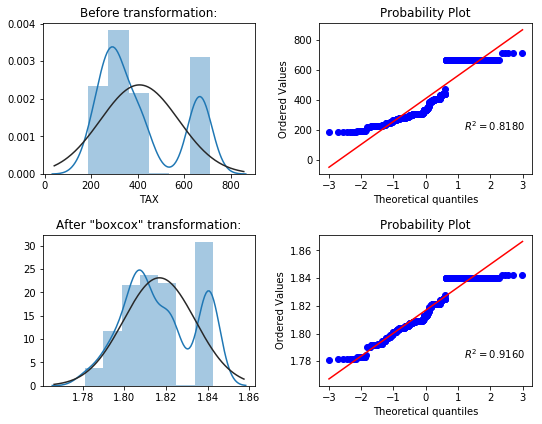

______________________________________________________________________
variable name:  PTRATIO


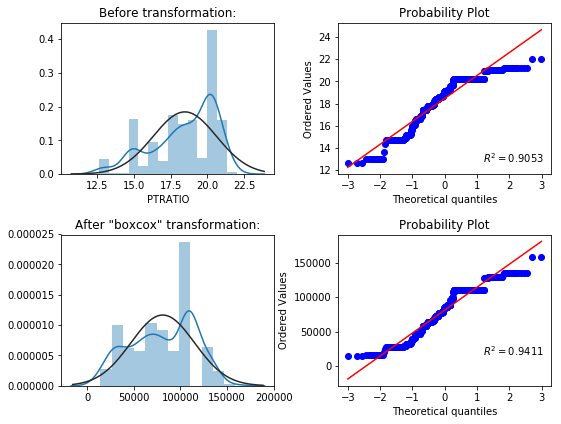

______________________________________________________________________
variable name:  B


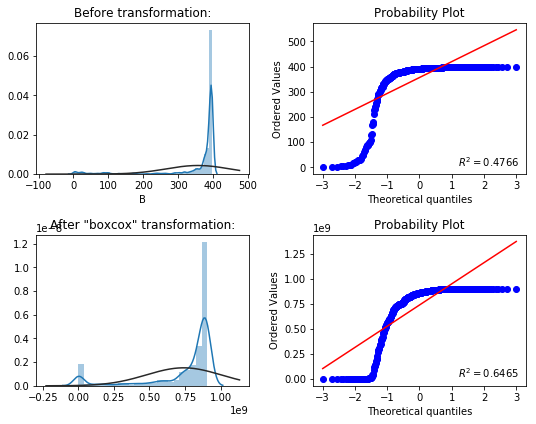

______________________________________________________________________
variable name:  LSTAT


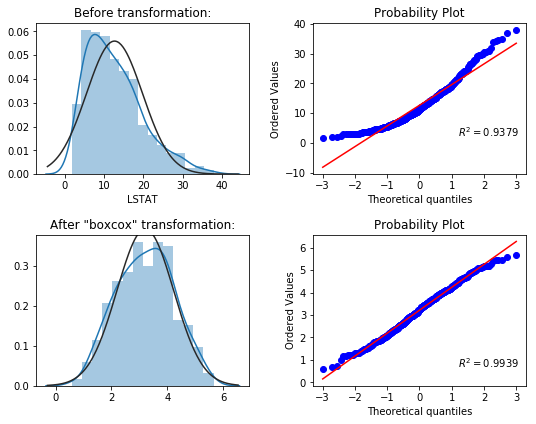

In [15]:
# To test the Statistical Assumptions on Continuous variables: We Check if our data meets the assumptions reuired by most mutivariate techniques _________
for i in L_con:
    print('_'*70 )
    print('variable name: ', i)
    
    fig = plt.figure(figsize=(8, 6))
    
    ax1 = fig.add_subplot(221)
    ax1=sns.distplot(df[i], fit=stats.norm)
    ax1.set_title('Before transformation:')
    
    ax2 = fig.add_subplot(222)
    res=stats.probplot(df[i], plot=ax2, rvalue=True)
    
    b=0
    if i in L:
        b=0.1
    
    ax3 = fig.add_subplot(223)
    ax3=sns.distplot(stats.boxcox(b+df[i])[0], fit=stats.norm)
    ax3.set_title('After "boxcox" transformation:')
    
    ax4 = fig.add_subplot(224)
    res=stats.probplot(stats.boxcox(b+df[i])[0], dist=stats.norm, plot=ax4, rvalue=True)
    
    fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.4, wspace=0.3)
    plt.show()

______________________________________________________________________
variable name:  CHAS


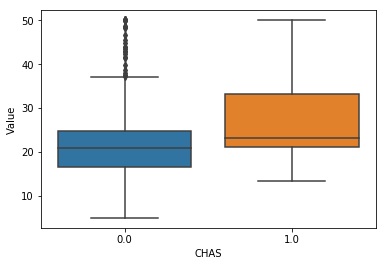

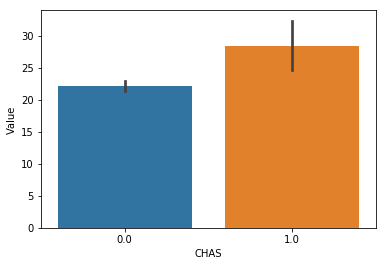

In [16]:
# Multivariable analysis of Categorical features: Boxplot & Barplot of Target Value for different Categories
for i in L_cat:
    print('_'*70 )
    print('variable name: ', i)
    
    sns.boxplot( x=i, y='Value', data=df)
    plt.show()
    
    sns.barplot( x=i, y='Value', data=df)
    plt.show()

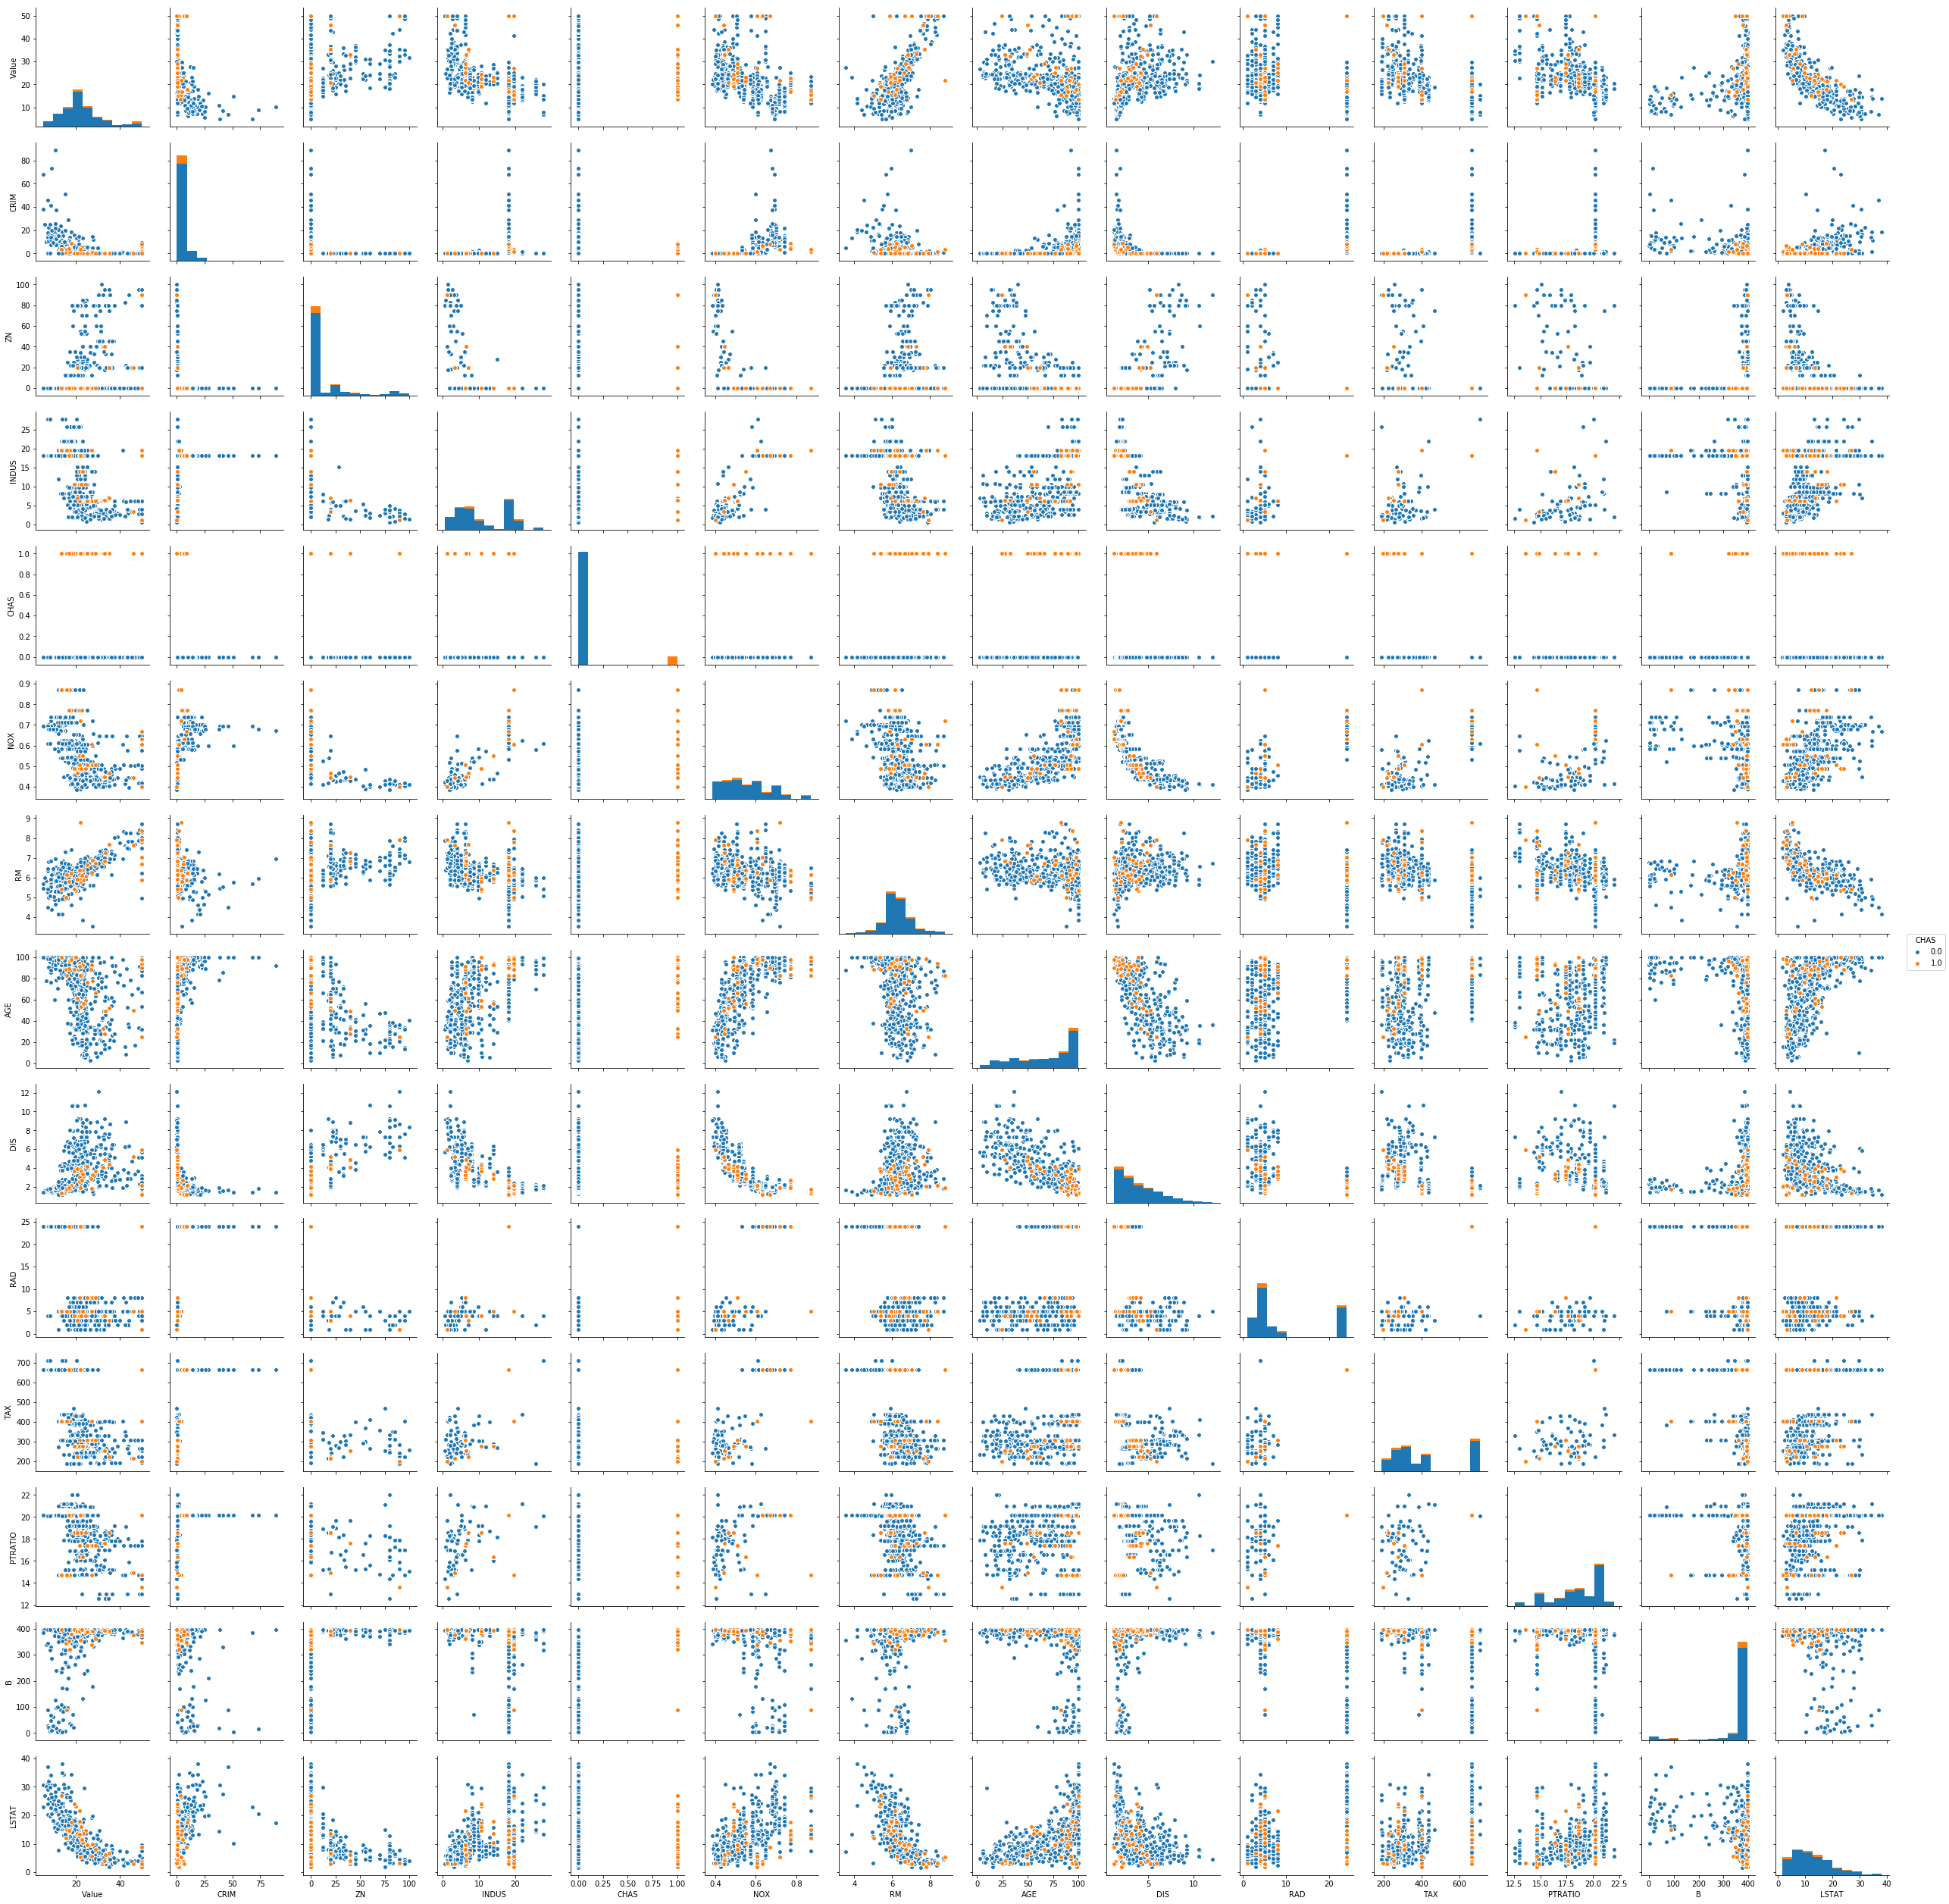

In [17]:
# Multivariable analysis of categorical features: Pairplot of Continuous variables
# for different categories of Categorical variables

sns.pairplot(df, hue='CHAS')